In [1]:
#Dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Data Prep

In [2]:
#Read `crypto_data.csv` into Pandas
file_path = './Resources/crypto_data.csv'
df = pd.read_csv(file_path, index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# list all algo in use
algo = set(df["Algorithm"].values)

In [4]:
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [5]:
traded_df = df.loc[df['IsTrading']== True]

traded_df['IsTrading'].value_counts()
traded_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
#Delete the IsTrading Column All values True 
df = traded_df.drop('IsTrading', axis=1)
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
#Additional cleaning remove null values
df = df.dropna(axis=0, how='any')
df.shape

(685, 5)

In [8]:
#sort value total coined mined to identify negative or zero value
df['TotalCoinsMined'].sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [9]:
df= df[df['TotalCoinsMined'] > 0]

In [10]:
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
df= df.drop('CoinName', axis =1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [12]:
#Created my X feature list(columns) anmd target y value
X = pd.get_dummies(data=df, columns=['Algorithm', "ProofType"])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [15]:
X_scaled.shape

(532, 98)

Reduce dataset dimensions with PCA




In [16]:
pca = PCA(n_components=.90)
principal_components = pca.fit_transform(X_scaled)

principal_components.shape

(532, 74)

In [17]:
#The sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.4728345756615

In [18]:
#Reduce dimention with t-SNE

tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

(532, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

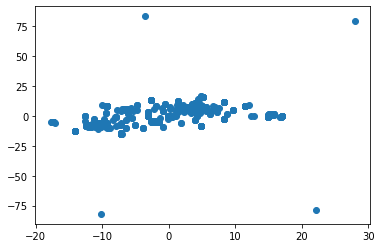

In [19]:
#Plot t-SNE output
X=tsne_features[:,0]
y = tsne_features[:,1]
plt.scatter(X,y)
plt.show

In [20]:
#Identify cluster with k-means
inertia = []
k = list(range(1,11))

for i in k:
    kmeans= KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

C:\Users\RobertW\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


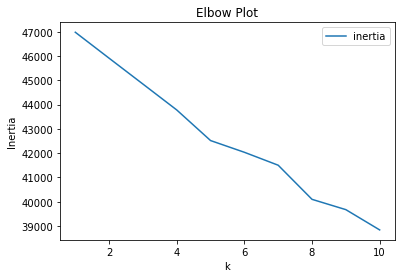

In [21]:
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()


# Conclusion
Both t-SNW and an elbow plot using kmeans suggest that there are not meanigful clusters in the dataset.

